## Exercise 6.5 Unsupervised Machine Learning: Clustering

### This script contains the following:

#### Step 1 - Install and import libraries
#### Step 2 - Import data and conduct necessary cleaning and manipulations 
#### Step 3 - Use the elbow technique
#### Step 4 - Decide on the number of clusters
#### Step 5 - Run the k-means algorithm
#### Step 6 - Attach new cluster column to the dataframe
#### Step 7 - Create visualizations
#### Step 8 - Discuss clusters
#### Step 9 - Calculate descriptive statistics for clusters
#### Step 10 - Propose what the results could be useful for in the future

### Step 1 - Install and import libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

### Step 2 - Import data and conduct necessary cleaning and manipulations

In [3]:
path = r'C:\Users\jomok\Documents\Career Foundry\Achievement 6\09-2023 FHL Bank Data Analysis'

In [4]:
df_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'FHL_bank_data_borr1_clean.pkl'))

In [5]:
df_all.shape

(269766, 21)

In [6]:
df_all.head()

,County,State,Year,LoanCharacteristicsID,Total Monthly Income Amount,Borrower 1 Age,Borrower 1 Race,Borrower 1 Credit Score Value,Property Unit Count,Note Rate Percent,...,Total Debt Expense Ratio Percent,Loan Purpose,Mortgage Type,First Time Homebuyer,Property Usage,Property Type,Loan Count,Borrower Count,Total Loan Count per State,Max Note Amount per State
0,Chittenden,Vermont,2019,2407198,7308,34.0,White,1,1,4.000,...,40.46,Purchase,FHA,Yes,Principal Residence,Single family detached,1,1,849,547560
1,Chittenden,Vermont,2019,2407199,7416,36.0,White,3,1,4.250,...,45.67,Purchase,FHA,No,Principal Residence,Single family detached,1,2,849,547560
2,Lamoille,Vermont,2019,2407200,5143,34.0,White,2,1,4.250,...,46.23,Purchase,FHA,No,Principal Residence,Single family detached,1,2,849,547560
3,Orange,Vermont,2019,2407201,8866,42.0,White,4,1,4.875,...,36.88,Purchase,VA,No,Principal Residence,Single family detached,1,2,849,547560
4,York,Maine,2019,2407202,15240,66.0,White,5,1,4.625,...,34.95,Purchase,Conventional,Yes,Principal Residence,Single family detached,1,1,813,575000


In [7]:
#aggregate 
agg = {'Total Monthly Income Amount':'mean',
      'Borrower 1 Age':'mean',
      'Note Rate Percent':'mean',
      'Total Debt Expense Ratio Percent':'mean',
      'Note Amount':'mean',
      'Loan Count':sum}

#group data according to county 
df = df_all.groupby(['County']).agg(agg)

#Check output of new DataFrame
df.head()

,Total Monthly Income Amount,Borrower 1 Age,Note Rate Percent,Total Debt Expense Ratio Percent,Note Amount,Loan Count
County,,,,,,
Acadia,2930.000000,43.000000,4.250000,35.070000,143000.000000,1
Accomack,15311.625000,54.875000,3.078125,28.800000,213765.000000,8
Ada,9860.116203,42.261866,4.213093,34.734763,342881.155483,611
Adair,6303.500000,38.574468,3.980053,30.128617,132862.585106,94
Adams,8574.659512,44.060488,3.447105,29.539863,197073.621463,2050


In [8]:
df.shape

(1579, 6)

### Step 3 - Use the elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\jomok\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jomok\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jomok\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jomok\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\jomok\anaconda3\Lib\site-packages\sklearn\clust

[-11154148988830.062,
 -4252239807171.6924,
 -2424449312117.0366,
 -1358513139371.6184,
 -908834166376.2778,
 -676576176818.1803,
 -516361238353.8087,
 -402191365083.8286,
 -324525343858.516]

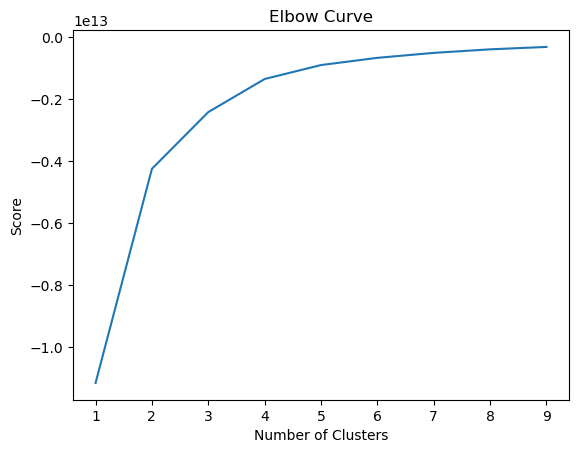

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Step 4 - There's a large jump from two to five on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is five.

### Step 5 - Run the k-means algorithm

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\jomok\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

### Step 6 - Attach new cluster column to the dataframe

In [14]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\jomok\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
df.head()

,Total Monthly Income Amount,Borrower 1 Age,Note Rate Percent,Total Debt Expense Ratio Percent,Note Amount,Loan Count,clusters
County,,,,,,,
Acadia,2930.000000,43.000000,4.250000,35.070000,143000.000000,1,4
Accomack,15311.625000,54.875000,3.078125,28.800000,213765.000000,8,1
Ada,9860.116203,42.261866,4.213093,34.734763,342881.155483,611,0
Adair,6303.500000,38.574468,3.980053,30.128617,132862.585106,94,4
Adams,8574.659512,44.060488,3.447105,29.539863,197073.621463,2050,1


In [16]:
df['clusters'].value_counts()

1    518
2    399
4    322
0    279
3     61
Name: clusters, dtype: int64

### Step 7 - Create visualizations

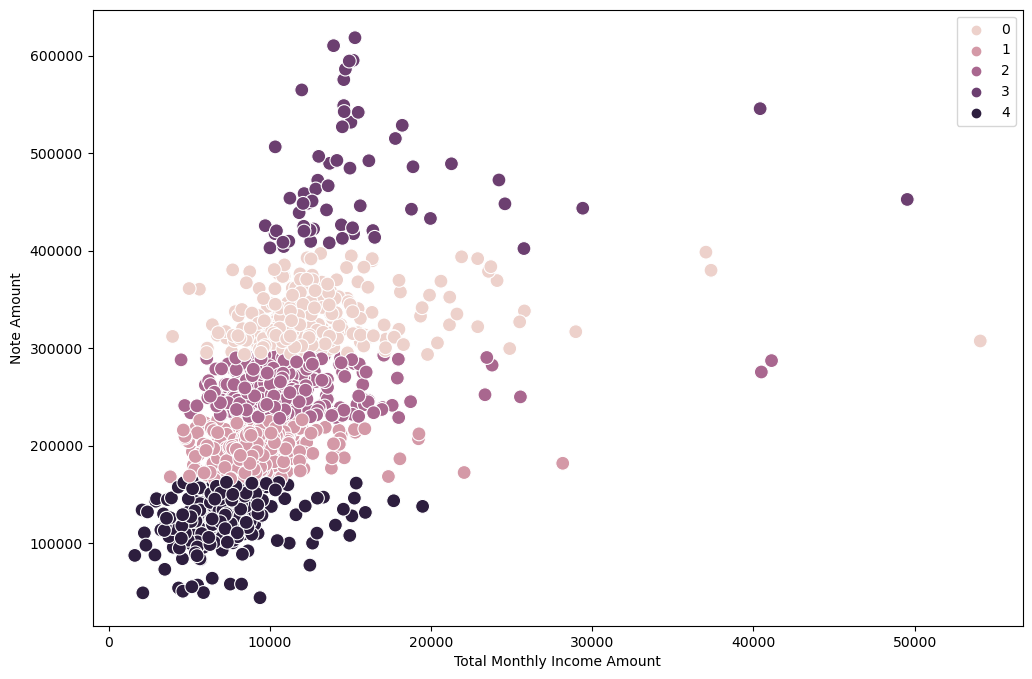

In [17]:
# Plot the clusters for the "Note Amount" and "Total Monthly Income" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Total Monthly Income Amount'], y=df['Note Amount'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Monthly Income Amount') # Label x-axis.
plt.ylabel('Note Amount') # Label y-axis.
plt.show()

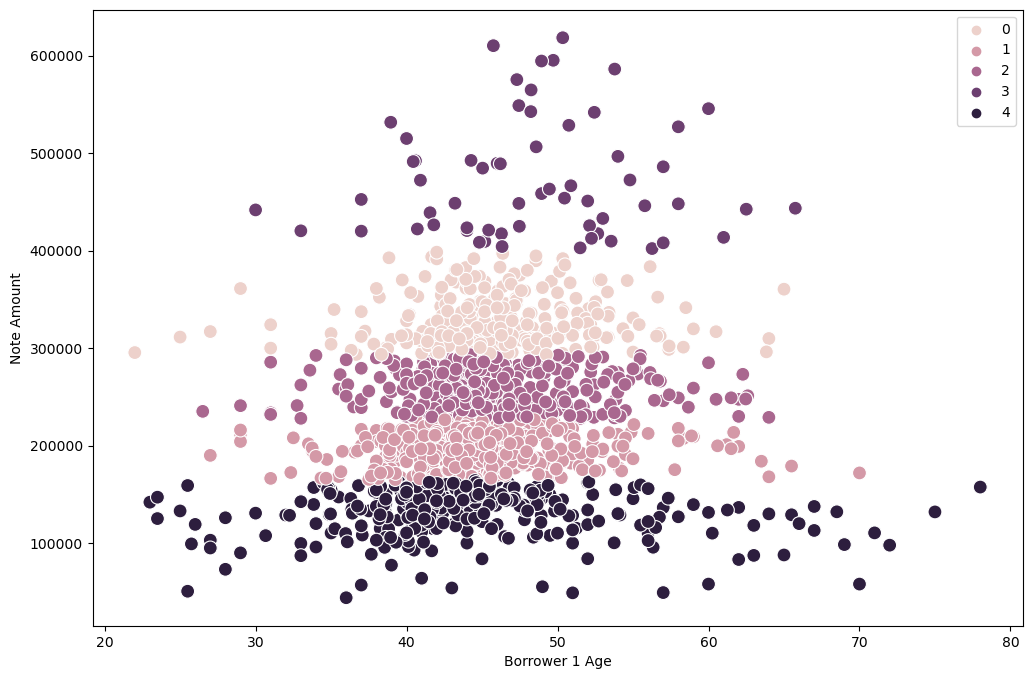

In [18]:
# Plot the clusters for the "Borrower 1 Age" and "Note Amount" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Borrower 1 Age'], y=df['Note Amount'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Borrower 1 Age') 
plt.ylabel('Note Amount') 
plt.show()

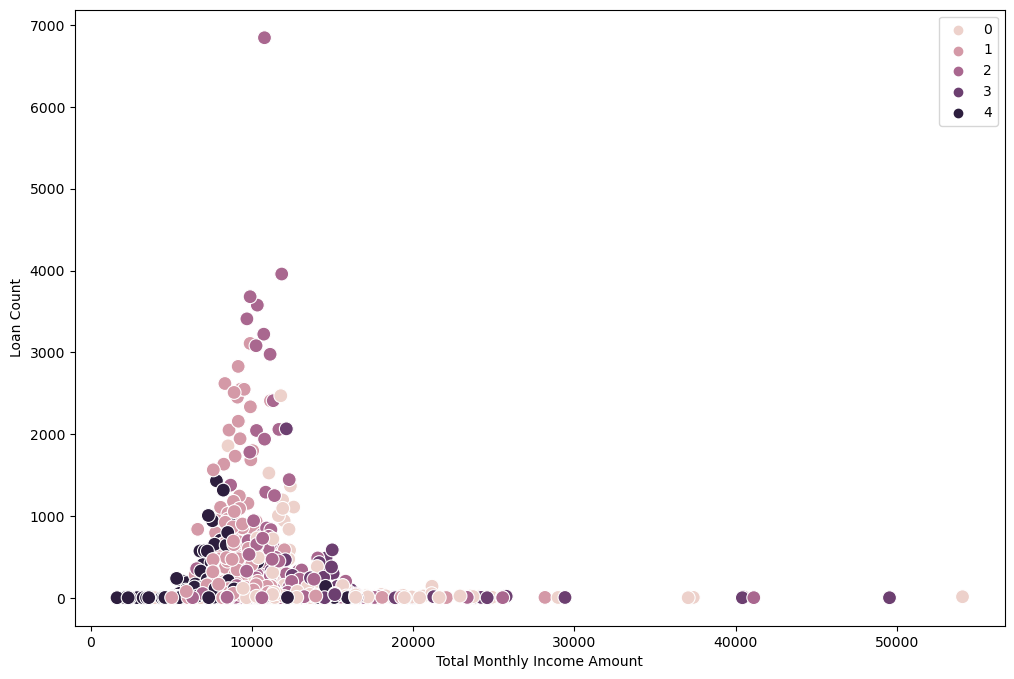

In [32]:
# Plot the clusters for the "Loan Count" and "Total Monthly Income" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Total Monthly Income Amount'], y=df['Loan Count'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Total Monthly Income Amount') # Label x-axis.
plt.ylabel('Loan Count') # Label y-axis.
plt.show()

In [20]:
# Plot the clusters for the

In [21]:
# Plot the clusters for the

In [22]:
# Plot the clusters for the

In [23]:
# Plot the clusters for the

In [24]:
# Plot the clusters for the

In [25]:
# Plot the clusters for the

In [26]:
# Plot the clusters for the

In [27]:
# Plot the clusters for the

In [28]:
# Plot the clusters for the

### Step 8 - Discuss clusters

Blah blah blah

### Step 9 - Calculate descriptive statistics for clusters

In [29]:
# Create groupings

df.loc[df['clusters'] == 4, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 3, 'cluster'] = 'purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'dark pink'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [30]:
df.groupby('cluster').agg({'Total Monthly Income Amount':['mean', 'median'], 
                         'Note Amount':['mean', 'median'], 
                         'Borrower 1 Age':['mean', 'median'],
                         'Note Rate Percent':['mean', 'median'], 
                         'Total Debt Expense Ratio Percent':['mean', 'median']})

Total Monthly Income Amount                  Note Amount  \
                                   mean        median           mean   
cluster                                                                
dark pink                  10779.359998  10330.804864  257567.761868   
dark purple                 7485.157584   7452.614396  132548.402947   
light pink                 12810.421909  11787.574494  329095.814419   
pink                        9127.552296   8910.960912  197246.725769   
purple                     15774.272541  14442.179283  472876.333164   

                           Borrower 1 Age            Note Rate Percent  \
                    median           mean     median              mean   
cluster                                                                  
dark pink    255197.000000      45.877724  45.300000          3.782141   
dark purple  137155.250000      44.294716  43.195238          3.578140   
light pink   320990.661290      45.937662  45.631579          3.921561   
pink         197397.372993      44.755505  44.417757          3.595306   
purple       452500.000000      48.461524  48.250000          3.846904   

                      Total Debt Expense Ratio Percent             
               median                             mean     median  
cluster                                                            
dark pink    3.750000                        32.173071  32.238317  
dark purple  3.466520                        30.138129  29.306505  
light pink   3.877600                        33.870782  33.636548  
pink         3.509583                        30.500622  30.028542  
purple       3.784709                        34.355505  35.456346

Discuss findings:

### Step 10 - Propose what the results could be useful for in the future

Discussion: